In [49]:
import pandas as pd
import re
import tabula
import librosa
import matplotlib.pyplot as plt
import librosa.display

In [51]:
from librosa.display import AdaptiveWaveplot

In [3]:
df = pd.read_csv(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\Data\niue outcomes.csv")

In [4]:
df.head()

,Record_ID,File_name,Outcome
0,1,065150_M.WAV,0
1,1,064736_A.WAV,0
2,1,064926_P.WAV,0
3,1,065025_T.WAV,0
4,2,070521_M.WAV,0


In [7]:
table = tabula.read_pdf(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\Data\report_abnormal_niue-20181124_013717.pdf")

Error importing jpype dependencies. Fallback to subprocess.
No module named 'jpype'
'pages' argument isn't specified.Will extract only from page 1 by default.
c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tabula\io.py:1045: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[c] = pd.to_numeric(df[c], errors="ignore")
c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tabula\io.py:1045: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[c] = pd.to_numeric(df[c], errors="ignore")


In [8]:
table[6]

,File Name,Accuracy (%),Prediction,Condition,Indication
0,niue/118/081711_T.WAV,0.00,Diastolic murmur,Normal,Normal
1,niue/36/141436_T.WAV,0.00,Normal,Abnormal-Mild,"mmr, mildly thickend mvl, RHD 2012, known & Im..."
2,niue/61/083942_T.WAV,0.00,Mitral Regurgitation,Normal,Normal
3,niue/41/064021_T.WAV,0.00,Mitral Regurgitation,Normal,Normal
4,niue/178/083304_T.WAV,1.79,Mitral Regurgitation,Normal,Normal
...,...,...,...,...,...
855,niue/204a/113838_T.WAV,100.00,Mitral Regurgitation,Abnormal-Moderate,"Known PS, modPR, mildPS, dil MPA"
856,niue/99/144421_P.WAV,100.00,Mitral Regurgitation,Abnormal-Severe,"RHD 2016, sevmr, modar, thickened mvl, avl, Lvdil"
857,niue/204b/145003_P.WAV,100.00,Mitral Regurgitation,Abnormal-Moderate,"Known PS, modPR, mildPS, dil MPA"
858,niue/204b/145055_T.WAV,100.00,Mitral Regurgitation,Abnormal-Moderate,"Known PS, modPR, mildPS, dil MPA"


In [10]:
table[6]["Prediction"].unique()

array(['Diastolic murmur', 'Normal', 'Mitral Regurgitation',
       'Aortic Stenosis'], dtype=object)

In [72]:
table[6]["Condition"].value_counts()

Condition
Normal               726
Abnormal-Mild        115
Abnormal-Moderate     14
Abnormal-Severe        5
Name: count, dtype: int64

In [36]:
df["Outcome"].value_counts()

Outcome
0    726
1    134
Name: count, dtype: int64

In [30]:
loc = []
for i in range(860):
    loc.append(re.findall(r"_([A-Z])", table[6].loc[i, 'File Name'])[0])
from collections import Counter
Counter(loc)

Counter({'M': 223, 'P': 213, 'T': 212, 'A': 212})

In [70]:
def waveplot_function(wav_path):
    figure = plt.figure(figsize=(14,6))
    
    audio_type,sample_rate = librosa.load(wav_path)
    print("sample rate", sample_rate)
    print(len(wav_path))
    print("duration", len(wav_path)/sample_rate)
    plt.figure(figsize=(6, 3))
    librosa.display.waveshow(y = audio_type,sr=sample_rate, color = "Black")
    plt.grid(True)
    plt.show()

def playing_function(wav_path):
    
    audio_type,sample_rate = librosa.load(wav_path)
    return Audio(audio_type,rate=sample_rate)

sample rate 22050
141
duration 0.006394557823129252


<Figure size 1400x600 with 0 Axes>

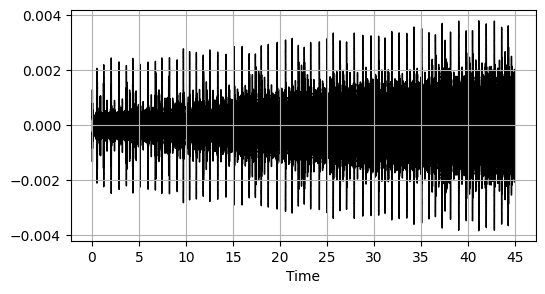

In [71]:
waveplot_function(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\Data\Recor-20240305T001003Z-001\Recor\1\064736_A.WAV")

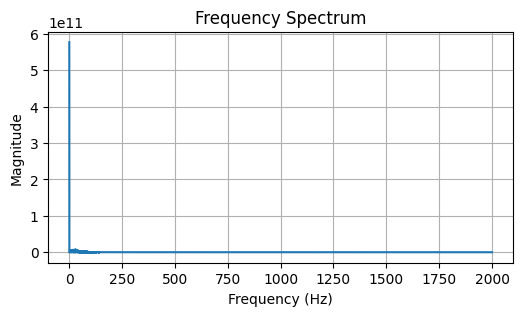

The frequency range of the audio file is from 0.00 Hz to 0.00 Hz.


In [61]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Load the audio file
sample_rate, data = wavfile.read(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\Data\Recor-20240305T001003Z-001\Recor\1\064736_A.WAV")

# If stereo, take only one channel
if len(data.shape) > 1:
    data = data[:, 0]

# Perform the Fourier Transform
n = len(data)
d = 1.0 / sample_rate
frequencies = np.fft.fftfreq(n, d)
fft_values = np.fft.fft(data)

# Get the magnitude of the FFT
magnitude = np.abs(fft_values)

# Plot the frequency spectrum
plt.figure(figsize=(6, 3))
plt.plot(frequencies[:n // 2], magnitude[:n // 2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()

# Determine the frequency range
# Find the index of the maximum magnitude
max_magnitude_index = np.argmax(magnitude)
max_frequency = frequencies[max_magnitude_index]
min_frequency = frequencies[np.where(magnitude > 0)[0][0]]

print(f"The frequency range of the audio file is from {min_frequency:.2f} Hz to {max_frequency:.2f} Hz.")


In [57]:
specs_nuie = np.load(r"C:\Users\rishi\OneDrive - Monash University\Documents\Monash\Sonorus\Sonorus - nuie data\preprocessed data\specs segmented.npy")

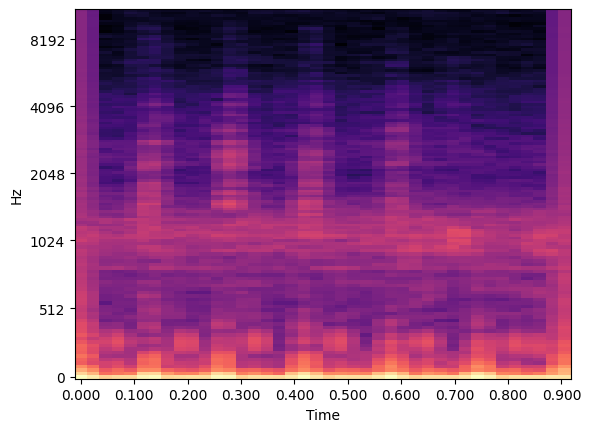

In [60]:
librosa.display.specshow(librosa.power_to_db(specs_nuie[5], ref=np.max), x_axis='time', y_axis='mel', sr=22050)

In [ ]:
# data length